In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from folium import plugins
from folium.features import CustomIcon
import googlemaps
import json
import pickle
import warnings

font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

warnings.filterwarnings(action='ignore')

<img src="https://img.jobkorea.co.kr/trans/c/200x80/w/o/JK_Co_workscomb.png"
 style="float: left;" width="250;"> 
 ## &nbsp; &nbsp; &nbsp; &nbsp; **예측을 일상화하다.**

## BMW 신규 거점 선정을 위한 분석 Report 


1. 2017-2021(1-5월) BMW 임포터 & 딜러사 동향

    1) 임포터
           - 수입자동차 분기별 판매추이
           - BMW 연월간 판매추이
           - BMW Vs Benz 연월간 판매추이
           - BMW 모델 별 누적판매량 순위 
           - BMW SUV Vs Sedan 연간 판매 추이비교
           - 연간 차량 등록 수 및 BMW SUV 판매추이 비교
           - 경쟁사 거점 분포
    2) 딜러사
           - 딜러사 거점 분포
           - 딜러사 거점 점유율

2. 전시장 & 서비스센터 신규 거점 분석

     1) 서울시 타겟 고객층 분석  
           - 인구통계 분석
           - 차량 등록 수
           - 차대차 교통사고 수 구별 분석
           
     2) 서울시 입지 비용 분석
           - 아파트/오피스텔 월세
           - 상권별 중대형 상가 월세(원/㎡)


In [2]:
df = pd.read_csv('D:\\data\\21.07_BMW미팅\\df_data/06. 2017_2021(1_5월)_6브랜드_모델_연도별_판매량.csv', encoding='utf-8')
df
# 2017

,Unnamed: 0,brand,year,car_name,sub_name,quentity
0,0,BMW,2017,5 Series,520d,"10,249"
1,1,BMW,2017,5 Series,520d xDrive,"5,712"
2,2,BMW,2017,5 Series,530i xDrive,"4,690"
3,3,BMW,2017,5 Series,530i,"4,560"
4,4,BMW,2017,5 Series,530d,569
...,...,...,...,...,...,...
1710,150,Volvo,2021,V90 Cross Country,B5 AWD,205
1711,151,Volvo,2021,V90 Cross Country,B6 AWD,7
1712,152,Volvo,2021,V90 Cross Country,B6 AWD,7
1713,153,Volvo,2021,S90,2.0 T8 AWD,53


In [3]:
df = df[['brand', 'year', 'car_name', 'sub_name', 'quentity']]
df

,brand,year,car_name,sub_name,quentity
0,BMW,2017,5 Series,520d,"10,249"
1,BMW,2017,5 Series,520d xDrive,"5,712"
2,BMW,2017,5 Series,530i xDrive,"4,690"
3,BMW,2017,5 Series,530i,"4,560"
4,BMW,2017,5 Series,530d,569
...,...,...,...,...,...
1710,Volvo,2021,V90 Cross Country,B5 AWD,205
1711,Volvo,2021,V90 Cross Country,B6 AWD,7
1712,Volvo,2021,V90 Cross Country,B6 AWD,7
1713,Volvo,2021,S90,2.0 T8 AWD,53


In [4]:
# quentity 문자열로 정수 변환x. 콤마제거하면서 정수변환하기
df['quentity'] = df.quentity.str.replace(',', '').astype('int64')

In [5]:
MB = df.loc[df['brand'] == 'MB']#MB

In [6]:
MB_quentity = MB.groupby(['year'])[['quentity']].sum()
MB_quentity

,quentity
year,
2017,77873
2018,80525
2019,86924
2020,81349
2021,37022


In [7]:
BMW = df.loc[df['brand'] == 'BMW']#BMW

In [8]:
# BMW SUV 모델 연간 판매량 증가 추이

BMWYear = BMW.groupby(['year','car_name'])[['quentity']].sum()
BMWYear 

quentity
year car_name                        
2017 1 Series                    7726
     2 Series Active Tourer      1900
     3 Series                   12608
     4 Series                    2723
     5 Series                   26892
...                               ...
2021 X6                          1793
     X6 M                         132
     X7                          1701
     Z4                           226
     i3                           130

[120 rows x 1 columns]

In [9]:
BMWYear = BMWYear.reset_index()

In [10]:
# sedan
BMWSedanYear = BMWYear[BMWYear['car_name'].isin(['5 Series','3 Series','1 Series','7 Series','6 Series','4 Series','2 Series Active Tourer','Gran Turismo','M','2 Series'
,'M5','Z4','M2','8 Series','New 4 Series','M4','i8','M3','M8','The new M3','The new M4 '])]
BMWSedanYear

,year,car_name,quentity
0,2017,1 Series,7726
1,2017,2 Series Active Tourer,1900
2,2017,3 Series,12608
3,2017,4 Series,2723
4,2017,5 Series,26892
...,...,...,...
102,2021,M5,150
103,2021,M8,18
104,2021,New 4 Series,537
105,2021,The new M3,72


In [11]:
BMWSedanYearQuentity = BMWSedanYear.groupby(['year'])[['quentity']].sum()
BMWSedanYearQuentity

,quentity
year,
2017,59492
2018,48226
2019,39470
2020,42709
2021,20711


In [12]:
BMWSedanYearQuentity = BMWSedanYearQuentity.reset_index()
BMWSedanYearQuentity

,year,quentity
0,2017,59492
1,2018,48226
2,2019,39470
3,2020,42709
4,2021,20711


In [13]:
# suv 특정 행값만 가져오기
BMWSuvYear = BMWYear[BMWYear['car_name'].isin(['X5', 'X3', 'X4', 'X6', 'X1', 'X7', 'X2', 'i3', 'X3 M', 'X4 M', 'X5 M', 'X6 M'])]
BMWSuvYear

,year,car_name,quentity
9,2017,X1,1530
10,2017,X3,1917
11,2017,X4,2854
12,2017,X5,3343
13,2017,X6,2607
15,2017,i3,386
30,2018,X1,842
31,2018,X2,108
32,2018,X3,2701
33,2018,X4,1156


In [14]:
BMWSuvYearQuentity = BMWSuvYear.groupby(['year','car_name'])[['quentity']].sum()
BMWSuvYearQuentity

quentity
year car_name          
2017 X1            1530
     X3            1917
     X4            2854
     X5            3343
     X6            2607
     i3             386
2018 X1             842
     X2             108
     X3            2701
     X4            1156
     X5            1959
     X6            1775
     i3             382
2019 X1            1509
     X2             765
     X3            2407
     X3 M           112
     X4            1786
     X4 M           106
     X5            2461
     X6            1087
     X7             522
     i3             508
2020 X1            1591
     X2             547
     X3            3688
     X3 M           294
     X4            3732
     X4 M           310
     X5            3638
     X5 M            86
     X6            2645
     X6 M           160
     X7            2783
     i3             304
2021 X1            1417
     X2             322
     X3            2048
     X3 M           100
     X4            1433
     X4 M            78
     X5            2326
     X5 M            88
     X6            1793
     X6 M           132
     X7            1701
     i3             130

In [15]:
# 두개의 그룹의 경우 피봇테이블로 변환

BMWSuvYearQuentity = BMWSuvYearQuentity.reset_index()
BMWSuvYearQuentity_pivot = BMWSuvYearQuentity.pivot(index='year',columns='car_name', values='quentity')

In [16]:
BMWSuvYearQuentity_pivot

car_name,X1,X2,X3,X3 M,X4,X4 M,X5,X5 M,X6,X6 M,X7,i3
year,,,,,,,,,,,,
2017,1530.0,NaN,1917.0,NaN,2854.0,NaN,3343.0,NaN,2607.0,NaN,NaN,386.0
2018,842.0,108.0,2701.0,NaN,1156.0,NaN,1959.0,NaN,1775.0,NaN,NaN,382.0
2019,1509.0,765.0,2407.0,112.0,1786.0,106.0,2461.0,NaN,1087.0,NaN,522.0,508.0
2020,1591.0,547.0,3688.0,294.0,3732.0,310.0,3638.0,86.0,2645.0,160.0,2783.0,304.0
2021,1417.0,322.0,2048.0,100.0,1433.0,78.0,2326.0,88.0,1793.0,132.0,1701.0,130.0


In [17]:
BMWSuvYearQuentity2 = BMWSuvYear.groupby(['year'])[['quentity']].sum()
BMWSuvYearQuentity2

,quentity
year,
2017,12637
2018,8923
2019,11263
2020,19778
2021,11568


In [18]:
BMWSuvYearQuentity2 = BMWSuvYearQuentity2.reset_index()
BMWSuvYearQuentity2

,year,quentity
0,2017,12637
1,2018,8923
2,2019,11263
3,2020,19778
4,2021,11568


In [19]:
BMWSuvSedanYear = pd.merge(BMWSedanYearQuentity, BMWSuvYearQuentity2, how = 'outer', on='year')
BMWSuvSedanYear               

,year,quentity_x,quentity_y
0,2017,59492,12637
1,2018,48226,8923
2,2019,39470,11263
3,2020,42709,19778
4,2021,20711,11568


In [20]:
BMWSuvSedanYear.columns = ['year', 'BMW_Sedan', 'BMW_SUV']
BMWSuvSedanYear

,year,BMW_Sedan,BMW_SUV
0,2017,59492,12637
1,2018,48226,8923
2,2019,39470,11263
3,2020,42709,19778
4,2021,20711,11568


In [21]:
# 2017~2021(1월~5월)총 누적 판매 순위
all_BMW_model_quentity = BMW.groupby(['car_name'])[['quentity']].sum()
all_BMW_model_quentity

,quentity
car_name,
1 Series,18338
2 Series,1294
2 Series Active Tourer,7002
3 Series,42392
4 Series,8030
5 Series,101035
6 Series,10243
7 Series,11762
8 Series,633


In [22]:
all_BMW_model_quentity = all_BMW_model_quentity.reset_index()

In [23]:
BMW_quentity = BMW.groupby(['year'])[['quentity']].sum()
BMW_quentity

,quentity
year,
2017,72129
2018,57149
2019,50733
2020,62487
2021,32337


In [24]:
BMWSalesRanking = all_BMW_model_quentity.sort_values('quentity', ascending=False)
BMWSalesRanking

,car_name,quentity
5,5 Series,101035
3,3 Series,42392
0,1 Series,18338
25,X5,13727
21,X3,12761
7,7 Series,11762
23,X4,10961
6,6 Series,10243
27,X6,9907
4,4 Series,8030


In [25]:
BMWSalesRanking.columns = ['BMW모델','판매량']#컬럼 변경

In [26]:
BMWSalesRanking['점유율'] = BMWSalesRanking['판매량']/274835*100
BMWSalesRanking
#점유율칼럼추가

,BMW모델,판매량,점유율
5,5 Series,101035,36.762057
3,3 Series,42392,15.424527
0,1 Series,18338,6.672367
25,X5,13727,4.994633
21,X3,12761,4.643150
7,7 Series,11762,4.279659
23,X4,10961,3.988211
6,6 Series,10243,3.726963
27,X6,9907,3.604708
4,4 Series,8030,2.921753


In [27]:
BMWSuv = BMWSalesRanking.loc[[25,21,23,27,19,29,20,31,22,24,28,26], :]
BMWSuv
# SUV 차량 점유율

,BMW모델,판매량,점유율
25,X5,13727,4.994633
21,X3,12761,4.643150
23,X4,10961,3.988211
27,X6,9907,3.604708
19,X1,6889,2.506595
29,X7,5006,1.821457
20,X2,1742,0.633835
31,i3,1710,0.622191
22,X3 M,506,0.184110
24,X4 M,494,0.179744


In [28]:
BMWSuvSum = BMWSuv['판매량'].sum()
BMWSuvSum

64169

In [29]:
BMWSuvSum = pd.DataFrame({'BMW':['SUV'], '판매량':[64169]})
BMWSuvSum

,BMW,판매량
0,SUV,64169


In [30]:
BMWSedan = BMWSalesRanking.loc[[5,3,0,7,6,4,2,9,10,1,14,30,11,8,16,13,32,12,15,17,18], :]
BMWSedan

,BMW모델,판매량,점유율
5,5 Series,101035,36.762057
3,3 Series,42392,15.424527
0,1 Series,18338,6.672367
7,7 Series,11762,4.279659
6,6 Series,10243,3.726963
4,4 Series,8030,2.921753
2,2 Series Active Tourer,7002,2.547710
9,Gran Turismo,2934,1.067550
10,M,1571,0.571616
1,2 Series,1294,0.470828


In [31]:
BMWSedanSum = BMWSedan['판매량'].sum()
BMWSedanSum

210666

In [32]:
BMWSedanSum = pd.DataFrame({'BMW':['Sedan'], '판매량':[210666]})
BMWSedanSum

,BMW,판매량
0,Sedan,210666


In [33]:
# 데이터프레임 합치기
BMWModel = pd.concat([BMWSuvSum, BMWSedanSum])
BMWModel                     

,BMW,판매량
0,SUV,64169
0,Sedan,210666


In [34]:
car_registration = pd.read_excel("D:\\data\\21.07_BMW미팅\\df_data/2021승용_승합_등록현황3.xlsx")
car_registration

,year,자가용총대수
0,2017,3.1
1,2018,2.6
2,2019,1.7
3,2020,2.8
4,2021,1.1


## 서울시 사고 지도 시각화 ##

In [35]:
seoul_acci = pd.read_table('D:\\data\\21.07_BMW미팅\\df_data/2017_2020_서울시_교통사고(사고유형별)_현황.txt',sep='\t')#탭구분
seoul_acci

,기간,자치구,구분,합계,사고유형별,사고유형별.1,사고유형별.2
0,기간,자치구,구분,합계,차대사람,차대차,차량단독
1,2017,합계,발생건수,"38,625","10,249","27,103","1,273"
2,2017,합계,사망자수,343,189,117,37
3,2017,합계,부상자수,"53,810","10,706","41,642","1,462"
4,2017,종로구,발생건수,"1,190",333,810,47
...,...,...,...,...,...,...,...
308,2020,송파구,사망자수,11,4,5,2
309,2020,송파구,부상자수,"3,509",502,"2,954",53
310,2020,강동구,발생건수,"1,268",342,890,36
311,2020,강동구,사망자수,7,3,4,-


In [36]:
seoul_acci = seoul_acci.drop(['합계','사고유형별','사고유형별.2'], axis=1)

In [37]:
seoul_acci.columns = ['기간','자치구','구분','차대차사고']

In [38]:
seoul_acci

,기간,자치구,구분,차대차사고
0,기간,자치구,구분,차대차
1,2017,합계,발생건수,"27,103"
2,2017,합계,사망자수,117
3,2017,합계,부상자수,"41,642"
4,2017,종로구,발생건수,810
...,...,...,...,...
308,2020,송파구,사망자수,5
309,2020,송파구,부상자수,"2,954"
310,2020,강동구,발생건수,890
311,2020,강동구,사망자수,4


In [39]:
seoul_acci2 = seoul_acci[seoul_acci['차대차사고'].isin(['-'])]
seoul_acci2

,기간,자치구,구분,차대차사고
134,2018,금천구,사망자수,-
140,2018,동작구,사망자수,-
143,2018,관악구,사망자수,-
173,2019,광진구,사망자수,-
188,2019,도봉구,사망자수,-
257,2020,중랑구,사망자수,-
275,2020,서대문구,사망자수,-


In [40]:
seoul_acci = seoul_acci.drop(index = [134, 140, 143, 173, 188, 257, 275])
seoul_acci

,기간,자치구,구분,차대차사고
0,기간,자치구,구분,차대차
1,2017,합계,발생건수,"27,103"
2,2017,합계,사망자수,117
3,2017,합계,부상자수,"41,642"
4,2017,종로구,발생건수,810
...,...,...,...,...
308,2020,송파구,사망자수,5
309,2020,송파구,부상자수,"2,954"
310,2020,강동구,발생건수,890
311,2020,강동구,사망자수,4


In [41]:
seoul_acci = seoul_acci.drop(0, axis=0)#0번째 row 삭제

In [42]:
# 콤마제거하면서 정수변환하기
seoul_acci['차대차사고'] = seoul_acci.차대차사고.str.replace(',', '').astype('int64')

In [43]:
# 특정 행값만 가져오기
seoul_acci= seoul_acci[seoul_acci['구분'].isin(['발생건수'])]
seoul_acci

,기간,자치구,구분,차대차사고
1,2017,합계,발생건수,27103
4,2017,종로구,발생건수,810
7,2017,중구,발생건수,896
10,2017,용산구,발생건수,994
13,2017,성동구,발생건수,788
...,...,...,...,...
298,2020,관악구,발생건수,1087
301,2020,서초구,발생건수,1813
304,2020,강남구,발생건수,2964
307,2020,송파구,발생건수,2064


In [44]:
seoul_acci = seoul_acci.drop(['구분'], axis=1)
seoul_acci

,기간,자치구,차대차사고
1,2017,합계,27103
4,2017,종로구,810
7,2017,중구,896
10,2017,용산구,994
13,2017,성동구,788
...,...,...,...
298,2020,관악구,1087
301,2020,서초구,1813
304,2020,강남구,2964
307,2020,송파구,2064


In [45]:
seoul_acci2 = seoul_acci.reset_index()
seoul_acci2

,index,기간,자치구,차대차사고
0,1,2017,합계,27103
1,4,2017,종로구,810
2,7,2017,중구,896
3,10,2017,용산구,994
4,13,2017,성동구,788
...,...,...,...,...
99,298,2020,관악구,1087
100,301,2020,서초구,1813
101,304,2020,강남구,2964
102,307,2020,송파구,2064


In [46]:
seoul_acci2 = seoul_acci2.drop(['index'], axis=1)

In [47]:
seoul_acci3 = seoul_acci2.groupby(['자치구'])[['차대차사고']].sum()

In [48]:
seoul_acci3 = seoul_acci3.reset_index()
seoul_acci3

,자치구,차대차사고
0,강남구,11025
1,강동구,3718
2,강북구,3113
3,강서구,4654
4,관악구,3806
5,광진구,2885
6,구로구,4151
7,금천구,2368
8,노원구,4609
9,도봉구,2141


In [49]:
seoul_acci3 = seoul_acci3.drop(index = [25])#합계 삭제

In [50]:
BMW_sc = pd.read_csv('D:\\data\\21.06_자동차매장조사\\df_data\\BMW/01_BMW_ALL서비스센터.csv')
BMW_sc

,ShopName,address,DealerName,Tel,lat,lng
0,강남역 서비스 센터,서울특별시 서초구 서초대로71길 10,코오롱모터스,02-586-3331,37.498113,127.024903
1,강북 서비스 센터,서울특별시 강북구 도봉로 101,한독모터스,02-3444-7301,37.618057,127.029050
2,강서 서비스 센터,서울특별시 강서구 공항대로 59,바바리안모터스,02-2661-7401,37.561364,126.813979
3,교대 서비스 센터,서울특별시 서초구 효령로53길 62,코오롱모터스,02-3472-7301,37.487519,127.013255
4,대치 서비스 센터,서울특별시 강남구 영동대로 340,코오롱모터스,02-569-7401,37.505064,127.065829
...,...,...,...,...,...,...
60,창원 서비스 센터,경상남도 창원시 마산회원구 봉양로 163,동성모터스,055-256-7301,35.218263,128.604576
61,포항 서비스 센터,경상북도 포항시 북구 새천년대로 569,동성모터스,054-272-7306,36.025119,129.352454
62,부산 롯데 패스트레인 서비스 센터,부산광역시 부산진구 신천대로 241,동성모터스,051-792-1810,35.163307,129.049316
63,울산 진장 롯데 패스트레인,울산 북구 진장유통로 64,동성모터스,052-702-8361,35.576004,129.359025


In [109]:
BMW_sc["brand"] = "BMW"
BMW_sc

,ShopName,address,DealerName,Tel,lat,lng,brand
0,강남역 서비스 센터,서울특별시 서초구 서초대로71길 10,코오롱모터스,02-586-3331,37.498113,127.024903,BMW
1,강북 서비스 센터,서울특별시 강북구 도봉로 101,한독모터스,02-3444-7301,37.618057,127.029050,BMW
2,강서 서비스 센터,서울특별시 강서구 공항대로 59,바바리안모터스,02-2661-7401,37.561364,126.813979,BMW
3,교대 서비스 센터,서울특별시 서초구 효령로53길 62,코오롱모터스,02-3472-7301,37.487519,127.013255,BMW
4,대치 서비스 센터,서울특별시 강남구 영동대로 340,코오롱모터스,02-569-7401,37.505064,127.065829,BMW
...,...,...,...,...,...,...,...
60,창원 서비스 센터,경상남도 창원시 마산회원구 봉양로 163,동성모터스,055-256-7301,35.218263,128.604576,BMW
61,포항 서비스 센터,경상북도 포항시 북구 새천년대로 569,동성모터스,054-272-7306,36.025119,129.352454,BMW
62,부산 롯데 패스트레인 서비스 센터,부산광역시 부산진구 신천대로 241,동성모터스,051-792-1810,35.163307,129.049316,BMW
63,울산 진장 롯데 패스트레인,울산 북구 진장유통로 64,동성모터스,052-702-8361,35.576004,129.359025,BMW


In [52]:
Benz_sc = pd.read_csv('D:\\data\\21.06_자동차매장조사\\df_data\\Benz/04_Benz_ALL서비스센터.csv')
Benz_sc

,ShopName,address,DealerName,Tel,lat,lng
0,파주 서비스센터,경기 파주시 문산읍 당동1로 66,모터원,031-972-5588,37.864689,126.772257
1,춘천 서비스센터,강원 춘천시 온의동 228-17,한성자동차,033-903-5100,37.862731,127.717513
2,의정부 서비스센터,경기 의정부시 시민로 309,모터원,031-841-5588,37.737649,127.069030
3,김포 서비스센터,경기 김포시 양촌읍 모산로 14,케이씨씨오토,031-991-9700,37.650996,126.657015
4,일산 서비스센터,경기 고양시 일산서구 법곳길 82,모터원,031-905-5588,37.665676,126.727816
...,...,...,...,...,...,...
60,해운대 서비스센터,부산 해운대구 해운대로 287,스타자동차,1688-2369,35.174866,129.131849
61,남천 서비스센터,부산 수영구 수영로 434,한성자동차,051-750-2800,35.144918,129.109999
62,울산 서비스센터,울산 남구 남중로74번길 19,스타자동차,1688-2369,35.541180,129.349987
63,포항 서비스센터,경북 포항시 남구 새천년대로 210,중앙모터스,054-256-9004,36.004707,129.324468


In [110]:
Benz_sc["brand"] = "Benz"
Benz_sc

,ShopName,address,DealerName,Tel,lat,lng,brand
0,파주 서비스센터,경기 파주시 문산읍 당동1로 66,모터원,031-972-5588,37.864689,126.772257,Benz
1,춘천 서비스센터,강원 춘천시 온의동 228-17,한성자동차,033-903-5100,37.862731,127.717513,Benz
2,의정부 서비스센터,경기 의정부시 시민로 309,모터원,031-841-5588,37.737649,127.069030,Benz
3,김포 서비스센터,경기 김포시 양촌읍 모산로 14,케이씨씨오토,031-991-9700,37.650996,126.657015,Benz
4,일산 서비스센터,경기 고양시 일산서구 법곳길 82,모터원,031-905-5588,37.665676,126.727816,Benz
...,...,...,...,...,...,...,...
60,해운대 서비스센터,부산 해운대구 해운대로 287,스타자동차,1688-2369,35.174866,129.131849,Benz
61,남천 서비스센터,부산 수영구 수영로 434,한성자동차,051-750-2800,35.144918,129.109999,Benz
62,울산 서비스센터,울산 남구 남중로74번길 19,스타자동차,1688-2369,35.541180,129.349987,Benz
63,포항 서비스센터,경북 포항시 남구 새천년대로 210,중앙모터스,054-256-9004,36.004707,129.324468,Benz


In [54]:
car_brand = {
'BMW' : 'D:\\data\\21.07_BMW미팅\\icon_image\\logo\\car/2020_BMW.png',
'Benz' : 'D:\\data\\21.07_BMW미팅\\icon_image\\logo\\car/benz.png',
'Audi' : 'D:\\data\\21.07_BMW미팅\\icon_image\\logo\\car/Audi.png',
}

#로고 아이콘
def makeicon(icon_image):
    icon = CustomIcon(
    icon_image=icon_image,
    icon_size=(25, 25),
    icon_anchor=(25, 25),
    shadow_image='',
    shadow_size=(5, 5),
    shadow_anchor=(4, 4),
    popup_anchor=(-3, -3)
    )
    return icon


# 구별이미지
def makeicon2(icon_image):
    icon2 = CustomIcon(
    icon_image=icon_image,
    icon_size=(35, 35),
    icon_anchor=(25, 25),
    shadow_image='',
    shadow_size=(5, 5),
    shadow_anchor=(4, 4),
    popup_anchor=(-3, -3)
    )
    return icon2


def make_maker(r):
    tmp = folium.Marker(
        location = [r['lat'],r['lng']], 
        tooltip='<b>매장정보<br>'+
                 '<br>매장이름 : '+r["ShopName"]+ 
                 '<br>주소 : '+r["address"]+
                 '<br>전화 : '+ r["Tel"]+ 
                 '<br>딜러 : '+ r["DealerName"],
        icon = makeicon(car_brand[r['brand']]))
    return tmp

In [55]:
gu_area = pd.read_excel("D:/data/21.07_BMW미팅/df_data/자치구_좌표.xlsx")

In [56]:
gu_icon = {
    '강남구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/강남구.png',
    '강동구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/강동구.png',
    '강북구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/강북구.png',
    '강서구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/강서구.png',
    '관악구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/관악구.png',
    '광진구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/광진구.png',
    '구로구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/구로구.png',
    '금천구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/금천구.png',
    '노원구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/노원구.png',
    '도봉구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/도봉구.png',
    '동대문구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/동대문구.png',
    '동작구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/동작구.png',
    '마포구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/마포구.png',
    '서대문구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/서대문구.png',
    '서초구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/서초구.png',
    '성동구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/성동구.png',
    '성북구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/성북구.png',
    '송파구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/송파구.png',
    '양천구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/양천구.png',
    '영등포구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/영등포구.png',
    '용산구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/용산구.png',
    '은평구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/은평구.png',
    '종로구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/종로구.png',
    '중구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/중구.png',
    '중랑구' : 'D:/data/21.07_BMW미팅/icon_image/logo/자치구(txt)/중랑구.png'
    
}
def gu_maker(gu):
    tmp = folium.Marker(
        location = [gu['lat'],gu['lng']], 
        icon = makeicon2(gu_icon[gu['구']]))
    return tmp 

# 1. 2017-2021(1-5월) BMW 임포터 & 딜러사 동향 


## 1) 임포터 


## 수입자동차 판매 추이

- BMW 화재사건 이후 판매량 회복 성공적
- Benz 판매량 변동이 큰 반면 BMW 판매량은 꾸준히 증가 두 브랜드 격차가 좁혀지고 있다.

In [57]:
Q_data2 = pd.read_excel("D:/data/21.07_BMW미팅/df_data/17~21분기별판매.xlsx")

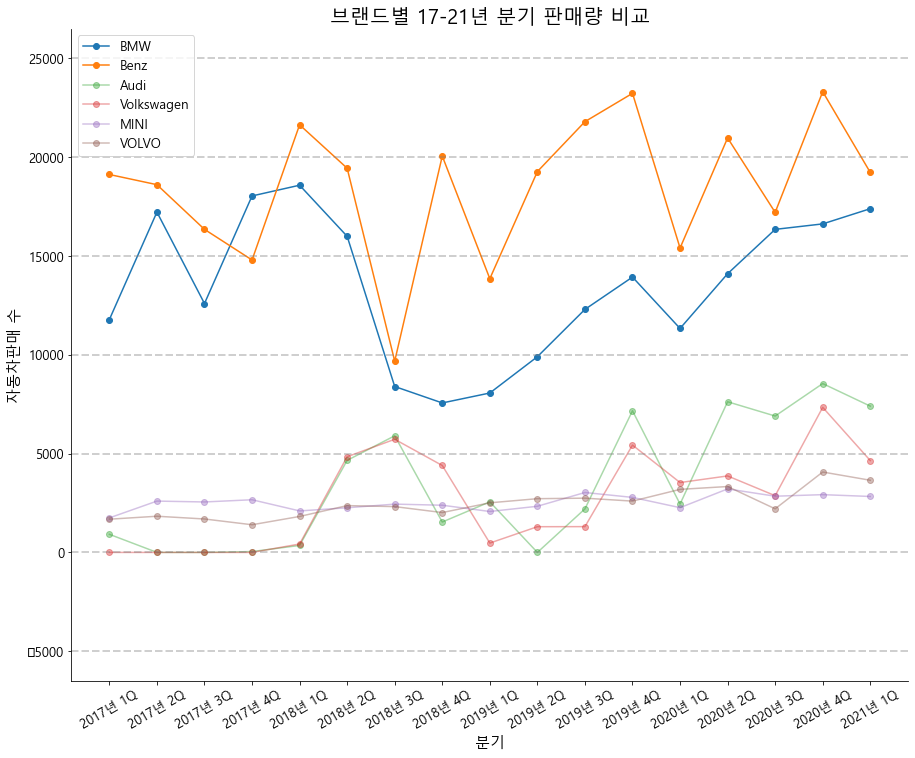

In [58]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김


ax.plot(Q_data2['분기'],Q_data2['bmw판매량'],marker='o',label='BMW') ## 선그래프 생성
ax.plot(Q_data2['분기'],Q_data2['benz판매량'],marker='o',label='Benz') ## 선그래프 생성
ax.plot(Q_data2['분기'],Q_data2['audi판매량'],marker='o',label='Audi',alpha=0.4) ## 선그래프 생성
ax.plot(Q_data2['분기'],Q_data2['volkswagen판매량'],marker='o',label='Volkswagen',alpha=0.4) ## 선그래프 생성
ax.plot(Q_data2['분기'],Q_data2['mini판매량'],marker='o',label='MINI',alpha=0.4) ## 선그래프 생성
ax.plot(Q_data2['분기'],Q_data2['volvo판매량'],marker='o',label='VOLVO',alpha=0.4) ## 선그래프 생성

ax.legend(loc='upper left', fontsize=13) ## 범례 생성

## 평균값을 y 눈금에 추가한다.
yticks = list(ax.get_yticks())
yticks = sorted(yticks)

for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)
    

plt.yticks(fontsize=13) ## y축 눈금 크기 설정
plt.xticks(rotation=30,fontsize=13) ## x축 눈금 회전각도와 크기 설정

plt.ylabel('자동차판매 수',rotation=90, fontsize=15, color='black') ## y축 라벨
plt.xlabel('분기',fontsize=15, color='black') ## x축 라벨
plt.title('브랜드별 17-21년 분기 판매량 비교',fontsize=20) ## 타이틀 설정
plt.show()

In [59]:
band6_2017 = pd.read_csv("D:/data/21.07_BMW미팅/df_data/01.2017년_월별_6브랜드_판매량.csv")
band6_2018 = pd.read_csv("D:/data/21.07_BMW미팅/df_data/02.2018년_월별_6브랜드_판매량.csv")
band6_2019 = pd.read_csv("D:/data/21.07_BMW미팅/df_data/03.2019년_월별_6브랜드_판매량.csv")
band6_2020 = pd.read_csv("D:/data/21.07_BMW미팅/df_data/04.2020년_월별_6브랜드_판매량.csv")
band6_2021 = pd.read_csv("D:/data/21.07_BMW미팅/df_data/05.2021년_월별_6브랜드_판매량.csv")
band6_total = pd.read_csv("D:/data/21.07_BMW미팅/df_data/00.2017~2021(1~5월)_총판매_6브랜드_판매량.csv")

In [60]:
band6_2017_bmw = band6_2017[band6_2017['브랜드'] == 'bmw']
band6_2018_bmw = band6_2018[band6_2018['브랜드'] == 'bmw']
band6_2019_bmw = band6_2019[band6_2019['브랜드'] == 'bmw']
band6_2020_bmw = band6_2020[band6_2020['브랜드'] == 'bmw']
band6_2021_bmw = band6_2021[band6_2021['브랜드'] == 'bmw']
band6_total = band6_total[band6_total['브랜드'] == 'bmw']

In [61]:
band6_2017_bmw = band6_2017_bmw.loc[:,'1월':'12월'].transpose()
band6_2018_bmw = band6_2018_bmw.loc[:,'1월':'12월'].transpose()
band6_2019_bmw = band6_2019_bmw.loc[:,'1월':'12월'].transpose()
band6_2020_bmw = band6_2020_bmw.loc[:,'1월':'12월'].transpose()
band6_2021_bmw = band6_2021_bmw.loc[:,'1월':'5월'].transpose()
band6_total = band6_total.loc[:,'2017년':'2021년(1~5월)'].transpose()

In [62]:
band6_2017_bmw.columns = ['2017_판매량']
band6_2018_bmw.columns = ['2018_판매량']
band6_2019_bmw.columns = ['2019_판매량']
band6_2020_bmw.columns = ['2020_판매량']
band6_2021_bmw.columns = ['2021_판매량']
band6_total.columns = ['17-21판매량']
band6_total.head(2)

,17-21판매량
2017년,59624
2018년,50524


In [63]:
mean_21= int(np.mean(band6_2021_bmw['2021_판매량']))

## BMW 연월간 판매 추이

- 17~21년 7월에 공통적으로 판매량이 적음
- 20년 8월 판매폭이 대폭증가
- 21년 판매추이와 19년도 판매추이와 비슷한 점으로 보아 20년8월 최고 판매량를 넘을것으로 추정

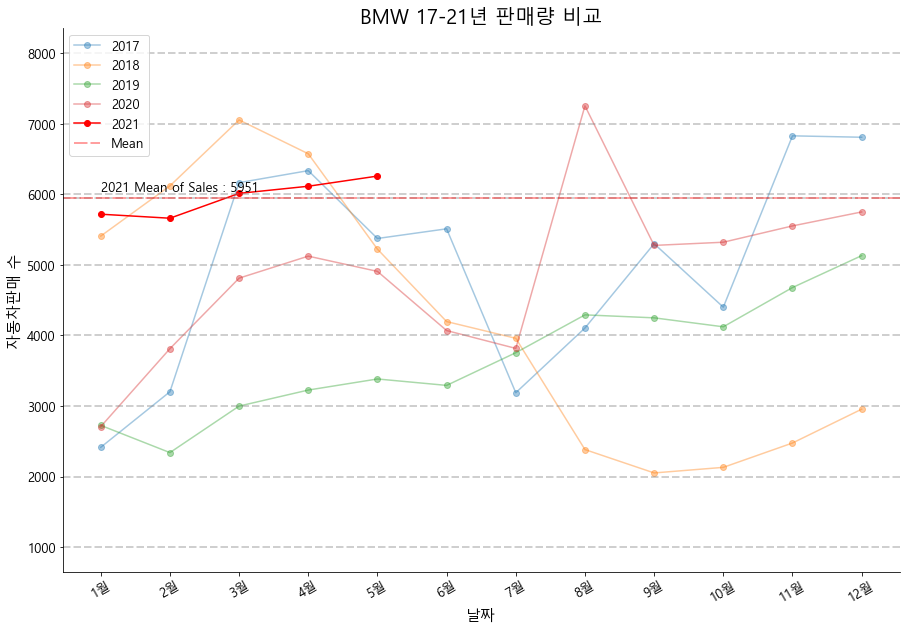

In [64]:
mean_sales = mean_21

fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김


ax.plot(band6_2018_bmw.index,band6_2017_bmw['2017_판매량'],marker='o',label='2017',alpha=0.4) ## 선그래프 생성
ax.plot(band6_2018_bmw.index,band6_2018_bmw['2018_판매량'],marker='o',label='2018',alpha=0.4) ## 선그래프 생성
ax.plot(band6_2019_bmw.index,band6_2019_bmw['2019_판매량'],marker='o',label='2019',alpha=0.4) ## 선그래프 생성
ax.plot(band6_2020_bmw.index,band6_2020_bmw['2020_판매량'],marker='o',label='2020',alpha=0.4) ## 선그래프 생성
ax.plot(band6_2021_bmw.index,band6_2021_bmw['2021_판매량'],marker='o',label='2021',alpha=1,color='red') ## 선그래프 생성

## 평균값을 y 눈금에 추가한다.
yticks2 = list(ax.get_yticks())
yticks2.append(mean_sales)
yticks2 = sorted(yticks2)

for y in yticks2:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)
    

ax.axhline(mean_sales,label='Mean',linestyle=(0,(9,2)),color='red',alpha=0.5) ## 평균값을 y좌표로 하는 수평선 생성


ax.text(0,mean_sales+100,f'2021 Mean of Sales : {mean_sales}',fontsize=13) ## 평균 매출 텍스트 출력
ax.legend(loc='upper left', fontsize=13) ## 범례 생성


plt.yticks(fontsize=13) ## y축 눈금 크기 설정
plt.xticks(rotation=30,fontsize=13) ## x축 눈금 회전각도와 크기 설정

plt.ylabel('자동차판매 수',rotation=90, fontsize=15, color='black') ## y축 라벨
plt.xlabel('날짜',fontsize=15, color='black') ## x축 라벨
plt.title('BMW 17-21년 판매량 비교',fontsize=20) ## 타이틀 설정
plt.show()

##  BMW Vs Benz 연월간 판매추이

- 19년 두 브랜드 간 총 판매량 격차가 가장 큼
- 20-21년 두 브랜드 간 판매량 격차가 현저히 좁아졌으므로 21년 하반기 BMW 판매량 주목 여지 있음

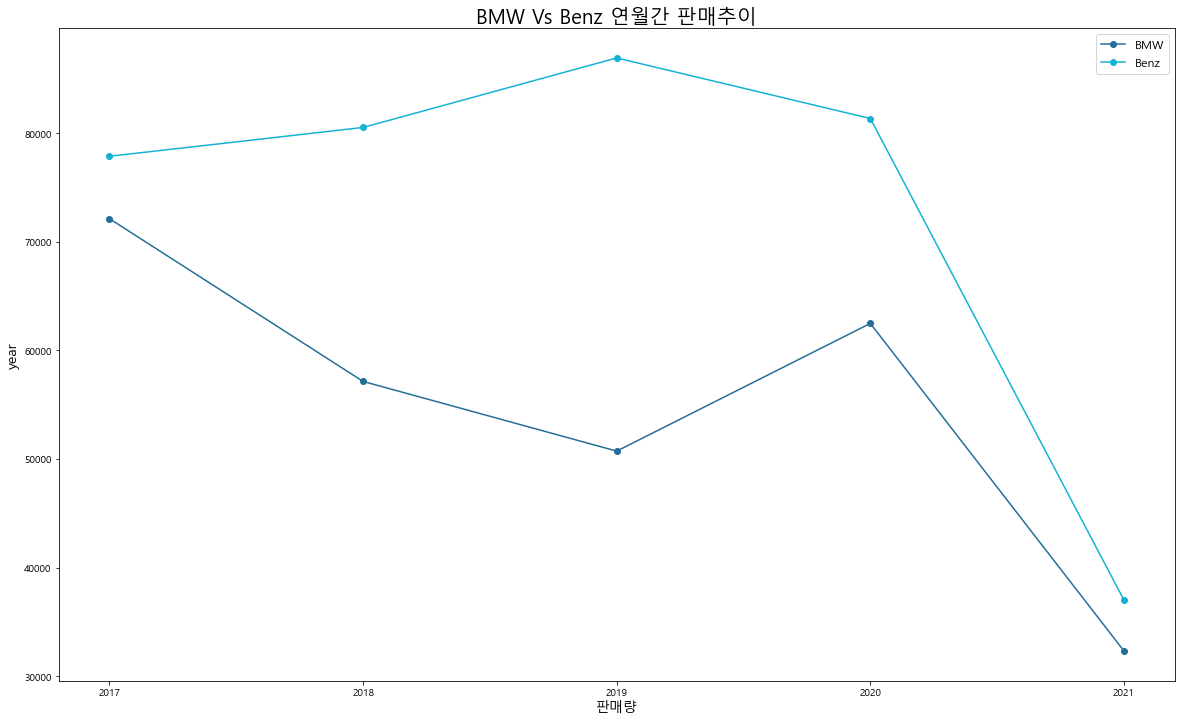

In [65]:
year = [2017, 2018, 2019, 2020, 2021]
index = np.arange(len(year))

# 차트 그리기
fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성

ax.plot(index, BMW_quentity, label='BMW', marker='o', color='#236E96') 
ax.plot(index, MB_quentity, label='Benz', marker='o', color='#15B2D3') 

ax.set_title('BMW Vs Benz 연월간 판매추이', fontsize=20) # 타이틀 설정
ax.set_ylabel('year', fontsize=14) # x축 설정
ax.set_xlabel('판매량', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.xticks(index, year)
plt.show()

In [66]:
BMW_quentity.to_csv("./Benz_BMW연간 판매추이.csv")

## BMW 모델 별 누적판매량 순위

- 누적 판매량 순위 : 5Series >3Series >1Series >X5 >X3

<AxesSubplot:title={'center':'BMW 모델 별 누적판매량 순위'}, xlabel='판매량', ylabel='BMW모델'>

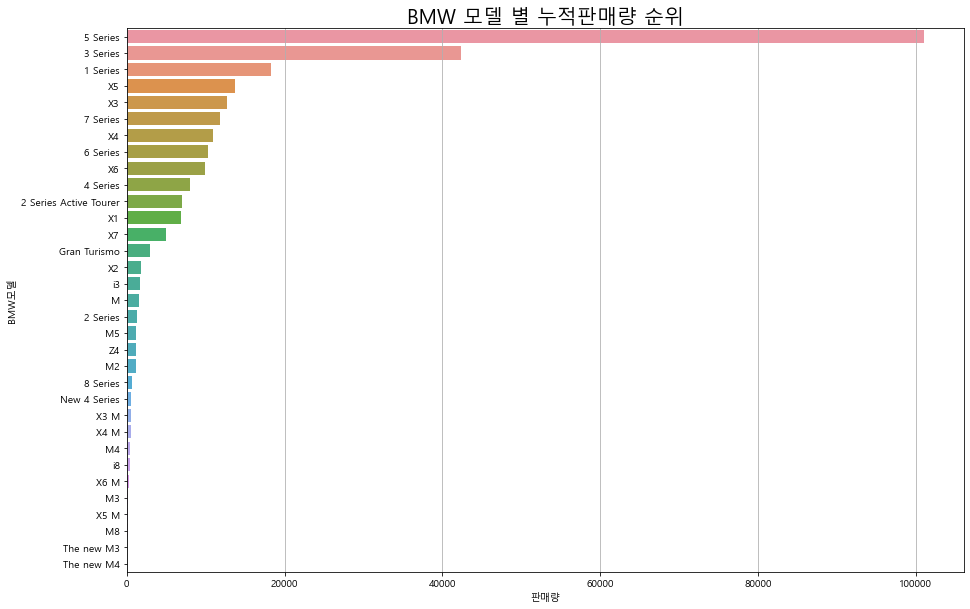

In [67]:
# seaborn 의 set 기능을 통해 폰트 설정
# "Malgun Gothic"

plt.figure(figsize=(15,10)) # size
plt.title('BMW 모델 별 누적판매량 순위', size= 20)
plt.grid(True) #눈금
plt.rotation=45
sns.barplot(x="판매량", y="BMW모델", data=BMWSalesRanking)

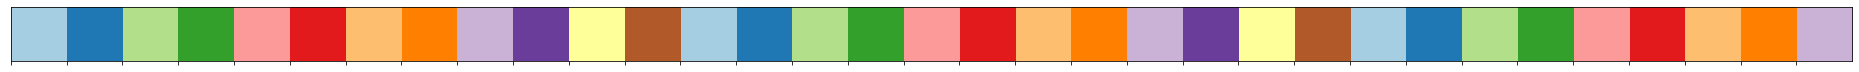

In [68]:
# color palette 설정
custom_palette = sns.color_palette("Paired", 33)
sns.palplot(custom_palette)

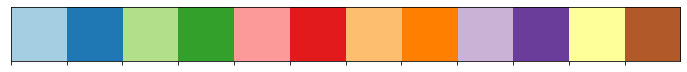

In [69]:
# color palette 설정
custom_palette2 = sns.color_palette("Paired", 12)
sns.palplot(custom_palette2)

## BMW 모델 별 판매 점유율 ##

- 5Series 판매 점유율은 전체 모델 중 41%로 과반수 차지, 3Series, 1Series 17.2% 7.4% 차지
- Sedan, SUV 모델 각 76.7%, 23.3% 판매 점유율 차지 
- 전체 SUV 모델 중 X5, X3, X4, 3개 모델 판매 점유율 총 58.2%로 과반수 차지
- Sedan 17-19년 판매량 급감한 반면 SUV모델 18-19년 소량 증가, 20년 큰폭으로 증가

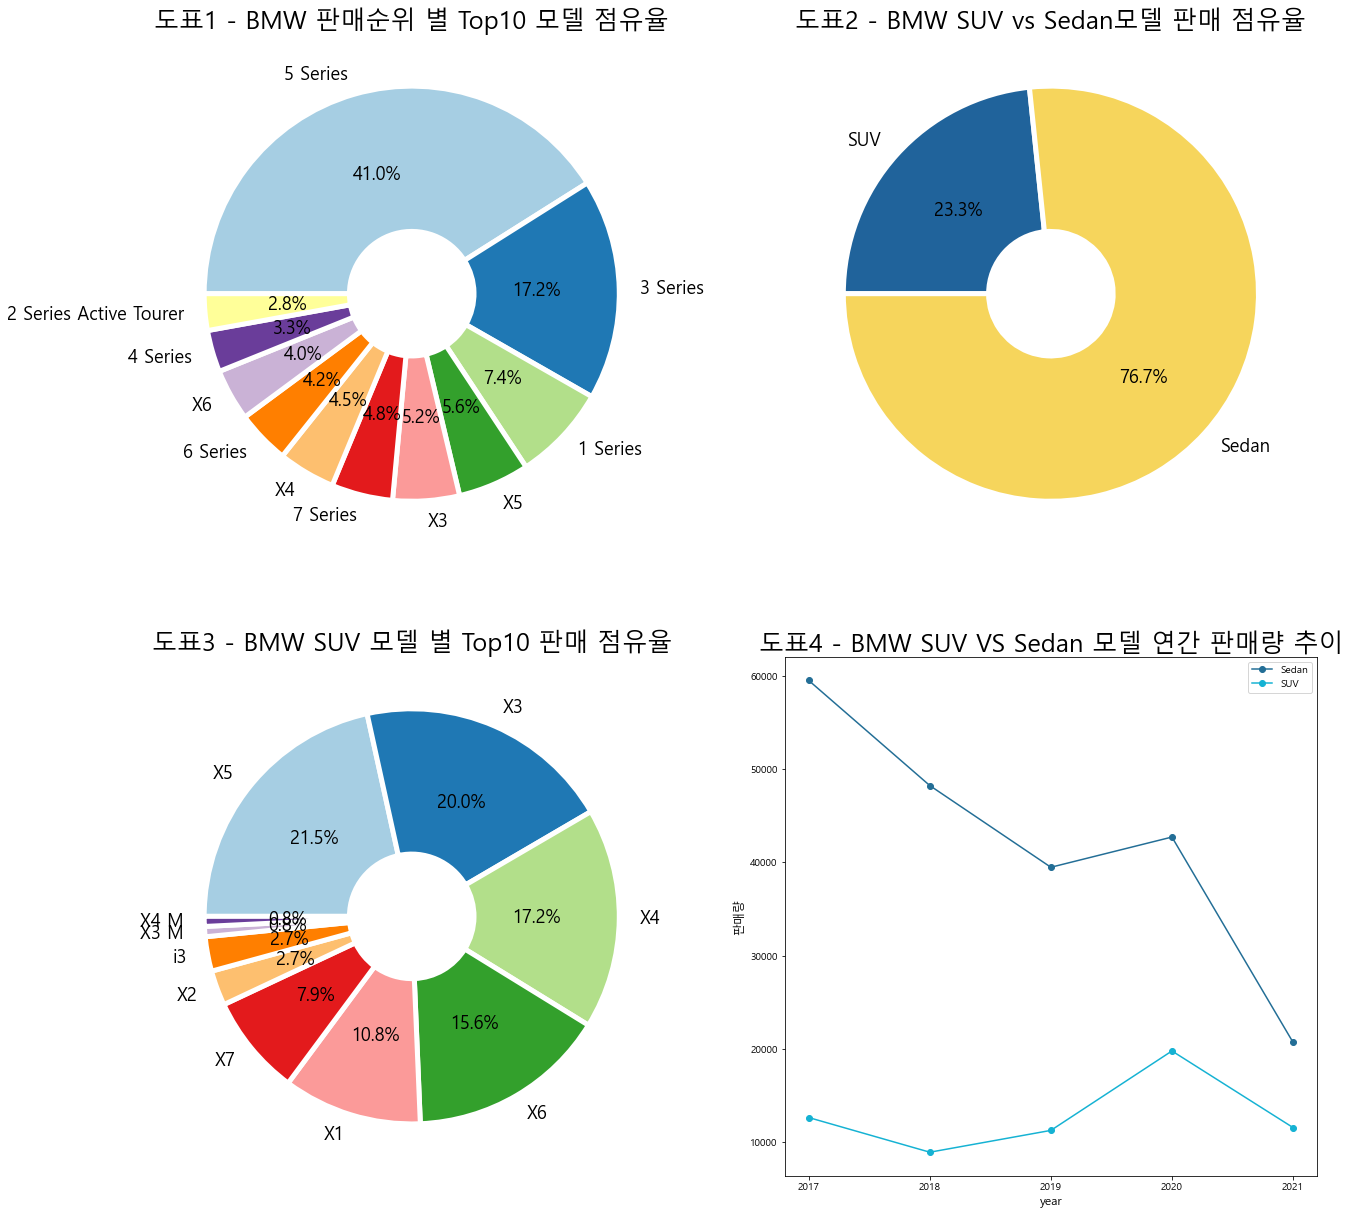

In [70]:

#도표1
labels = ['5 Series','3 Series','1 Series','X5','X3','7 Series','X4','6 Series','X6','4 Series',
        '2 Series Active Tourer']

colors = custom_palette

plt.figure(figsize = (21,21))
plt.subplot(221)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(BMWSalesRanking['판매량'][:11],#1%미만 절삭, 14개 모델
        labels=labels, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("도표1 - BMW 판매순위 별 Top10 모델 점유율",size=25)

# 자간조정 필요


#도표2
labels2 = ['SUV','Sedan']
colors2 = ['#20639B','#F6D55C']

plt.subplot(222)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(BMWModel['판매량'],
        labels=labels2, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors2, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("도표2 - BMW SUV vs Sedan모델 판매 점유율",size=25)


#도표3
labels3 = ['X5', 'X3', 'X4', 'X6', 'X1', 'X7', 'X2', 'i3', 'X3 M', 'X4 M']
colors2 = custom_palette2

plt.subplot(223)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(BMWSuv['판매량'][:10],
        labels=labels3, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors2, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("도표3 - BMW SUV 모델 별 Top10 판매 점유율",size=25)


#도표4
ax = plt.subplot(224)#프레임생성

#꺾은선 그래프 추가

year = [2017, 2018, 2019, 2020, 2021]
index = np.arange(len(year))

ax.plot(index, BMWSuvSedanYear['BMW_Sedan'], label='Sedan', marker='o', color='#236E96') 
ax.plot(index, BMWSuvSedanYear['BMW_SUV'], label='SUV', marker='o', color='#15B2D3') 

ax.set_title('도표4 - BMW SUV VS Sedan 모델 연간 판매량 추이', fontsize=25) # 타이틀 설정
ax.set_ylabel('판매량', fontsize=12) # x축 설정
ax.set_xlabel('year', fontsize=12) # y축 설정

ax.legend(fontsize=10, loc='best') 

plt.xticks(index, year)
plt.show()

## 연간 차량 등록 수 및 BMW SUV 판매추이 비교 ##

- 자동차 등록 수와 SUV 판매량 증감 추이로 보아 관련성 있음

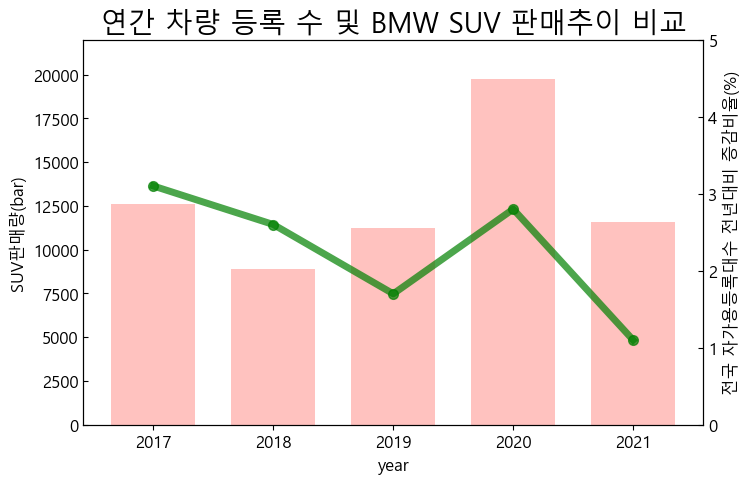

In [71]:
# 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'

# labels = [2017,2018,2019,2020,'2021(1~5월)']
# colors = custom_palette

x = np.arange(2017, 2022)
fig, ax1 = plt.subplots()

# 그래프1 - SUV 모델 연간 총 판매량 추이

ax1.bar(x,BMWSuvYearQuentity2['quentity'], color='#FFA8A5', label='Demand', alpha=0.7, width=0.7)
ax1.set_ylim(0, 22000)
ax1.set_ylabel('SUV판매량(bar)')
ax1.set_xlabel('year')
ax1.tick_params(axis='y', direction='in')
plt.title('연간 차량 등록 수 및 BMW SUV 판매추이 비교', size = 20)

# 그래프2 -연도별 자동차 등록현황 자가용 총대수(

ax2 = ax1.twinx()

ax2.plot(x, car_registration['자가용총대수'], marker = 'o', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax2.set_ylim(0, 5)
ax2.set_xlabel('year')
ax2.set_ylabel('전국 자가용등록대수 전년대비 증감비율(%)')
ax2.tick_params(axis='both', direction='in')

plt.show()

In [72]:
BMW = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/BMW/00_BMW_ALLdata.csv')
Benz = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/Benz/00_Benz_ALLdata.csv')
Audi = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/Audi/00_Audi_ALLdata.csv')

BMW_sc = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/BMW/01_BMW_ALL서비스센터.csv')
BMW_sr = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/BMW/02_BMW_ALL전시장.csv')
BMW_bps_sr = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/BMW/03_BMW_ALLBps전시장.csv')

Benz_sr = pd.read_csv('D:/data/21.06_자동차매장조사/df_data/Benz/02_Benz_ALL전시장.csv')

In [73]:
Benz_sr["brand"] = "Benz"
BMW_sr["brand"] = "BMW"

In [74]:
Kolon = BMW.loc[BMW['DealerName'].str.contains('코오롱모터스', na=False)]
Handok = BMW.loc[BMW['DealerName'].str.contains('한독모터스', na=False)]
DongSung = BMW.loc[BMW['DealerName'].str.contains('동성모터스', na=False)]
Bavarian = BMW.loc[BMW['DealerName'].str.contains('바바리안모터스', na=False)]
Deutsch = BMW.loc[BMW['DealerName'].str.contains('도이치모터스', na=False)]
National = BMW.loc[BMW['DealerName'].str.contains('내쇼날모터스', na=False)]
Samchully = BMW.loc[BMW['DealerName'].str.contains('삼천리모터스', na=False)]

In [75]:
#인덱스 재설정
Kolon.reset_index(inplace=True)
Handok.reset_index(inplace=True)
DongSung.reset_index(inplace=True)
Bavarian.reset_index(inplace=True)
Deutsch.reset_index(inplace=True)
National.reset_index(inplace=True)
Samchully.reset_index(inplace=True)

In [76]:
#기존 인덱스 삭제
del Kolon["index"]
del Handok["index"]
del DongSung["index"]
del Bavarian["index"]
del Deutsch["index"]
del National["index"]
del Samchully["index"]

## 2) 딜러사

## 딜러사 거점 분포

In [78]:
map = folium.Map(location=[35.775301, 128.029343], zoom_start=6.5, tiles=None)
folium.TileLayer('Stamen Toner', name='딜러사별 거점 현황').add_to(map)
mcg = folium.plugins.MarkerCluster(control=False)
map.add_child(mcg)

g1 = folium.plugins.FeatureGroupSubGroup(mcg, '코오롱모터스(red)')
map.add_child(g1)
g2 = folium.plugins.FeatureGroupSubGroup(mcg, '한독모터스(blue)')
map.add_child(g2)
g3 = folium.plugins.FeatureGroupSubGroup(mcg, '바바리안모터스(green)')
map.add_child(g3)
g4 = folium.plugins.FeatureGroupSubGroup(mcg, '도이치모터스(purple)')
map.add_child(g4)
g5 = folium.plugins.FeatureGroupSubGroup(mcg, '내쇼날모터스(orange)')
map.add_child(g5)
g6 = folium.plugins.FeatureGroupSubGroup(mcg, '삼천리모터스(darkred)')
map.add_child(g6)
g7 = folium.plugins.FeatureGroupSubGroup(mcg, '동성모터스(pink)')
map.add_child(g7)




#코오롱모터스
for n in Kolon.index:
    folium.Marker(location=[Kolon["lat"][n],Kolon["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+Kolon["ShopName"][n] + '<p><b> 주소 : '
                                         +Kolon["address"][n]+
                                        '<p><b> 전화 : '+ Kolon["Tel"][n] + '<p><b> 딜러 : '+ Kolon["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'red')).add_to(g1)

#한독모터스
for n in Handok.index:
    folium.Marker(location=[Handok["lat"][n],Handok["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+Handok["ShopName"][n] + '<p><b> 주소 : '
                                         +Handok["address"][n]+
                                        '<p><b> 전화 : '+ Handok["Tel"][n] + '<p><b> 딜러 : '+ Handok["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'blue')).add_to(g2)
#바바리안모터스
for n in Bavarian.index:
    folium.Marker(location=[Bavarian["lat"][n],Bavarian["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+Bavarian["ShopName"][n] + '<p><b> 주소 : '
                                         +Bavarian["address"][n]+
                                        '<p><b> 전화 : '+ Bavarian["Tel"][n] + '<p><b> 딜러 : '+ Bavarian["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'green')).add_to(g3)
#도이치모터스
for n in Deutsch.index:
    folium.Marker(location=[Deutsch["lat"][n],Deutsch["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+Deutsch["ShopName"][n] + '<p><b> 주소 : '
                                         +Deutsch["address"][n]+
                                        '<p><b> 전화 : '+ Deutsch["Tel"][n] + '<p><b> 딜러 : '+ Deutsch["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'purple')).add_to(g4)
#내쇼날모터스
for n in National.index:
    folium.Marker(location=[National["lat"][n],National["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+National["ShopName"][n] + '<p><b> 주소 : '
                                         +National["address"][n]+
                                        '<p><b> 전화 : '+ National["Tel"][n] + '<p><b> 딜러 : '+ National["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'orange')).add_to(g5)
#삼천리모터스
for n in Samchully.index:
    folium.Marker(location=[Samchully["lat"][n],Samchully["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+Samchully["ShopName"][n] + '<p><b> 주소 : '
                                         +Samchully["address"][n]+
                                        '<p><b> 전화 : '+ Samchully["Tel"][n] + '<p><b> 딜러 : '+ Samchully["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'darkred')).add_to(g6)

#동성모터스
for n in DongSung.index:
    folium.Marker(location=[DongSung["lat"][n],DongSung["lng"][n]],
                                tooltip=('<b>매장정보'+'<p><b> 매장이름 : '+DongSung["ShopName"][n] + '<p><b> 주소 : '
                                         +DongSung["address"][n]+
                                        '<p><b> 전화 : '+ DongSung["Tel"][n] + '<p><b> 딜러 : '+ DongSung["DealerName"][n]),
                      radius=10,
                      icon=folium.Icon(color = 'pink')).add_to(g7)
    

folium.LayerControl(collapsed=False).add_to(map)

map

In [79]:
bmw_Dealer_sc_cnt = pd.read_excel("D:/data/21.07_BMW미팅/df_data/BMW_딜러별_서비스센터_거점수.xlsx")
bmw_Dealer_sr_cnt = pd.read_excel("D:/data/21.07_BMW미팅/df_data//BMW_딜러별_전시장_거점수.xlsx")
bmw_Dealer_bps_sr_cnt = pd.read_excel("D:/data/21.07_BMW미팅/df_data//BMW_딜러별_전시장_거점수.xlsx")

## 딜러사 거점 점유율

- 코오롱과 도이치 모터스가 대부분의 점유율을 차지함
- 바바리안모터스특징은 세일즈 중심의 운영, 동성모터스는 서비스센터에 비중이 높음
    - 서비스 센터 : 한독 > 동성 > 바바리안
    - 전시장      : 한독 > 바바리안 > 동성
    - BPS         : 한독 > 바바리안 > 동성


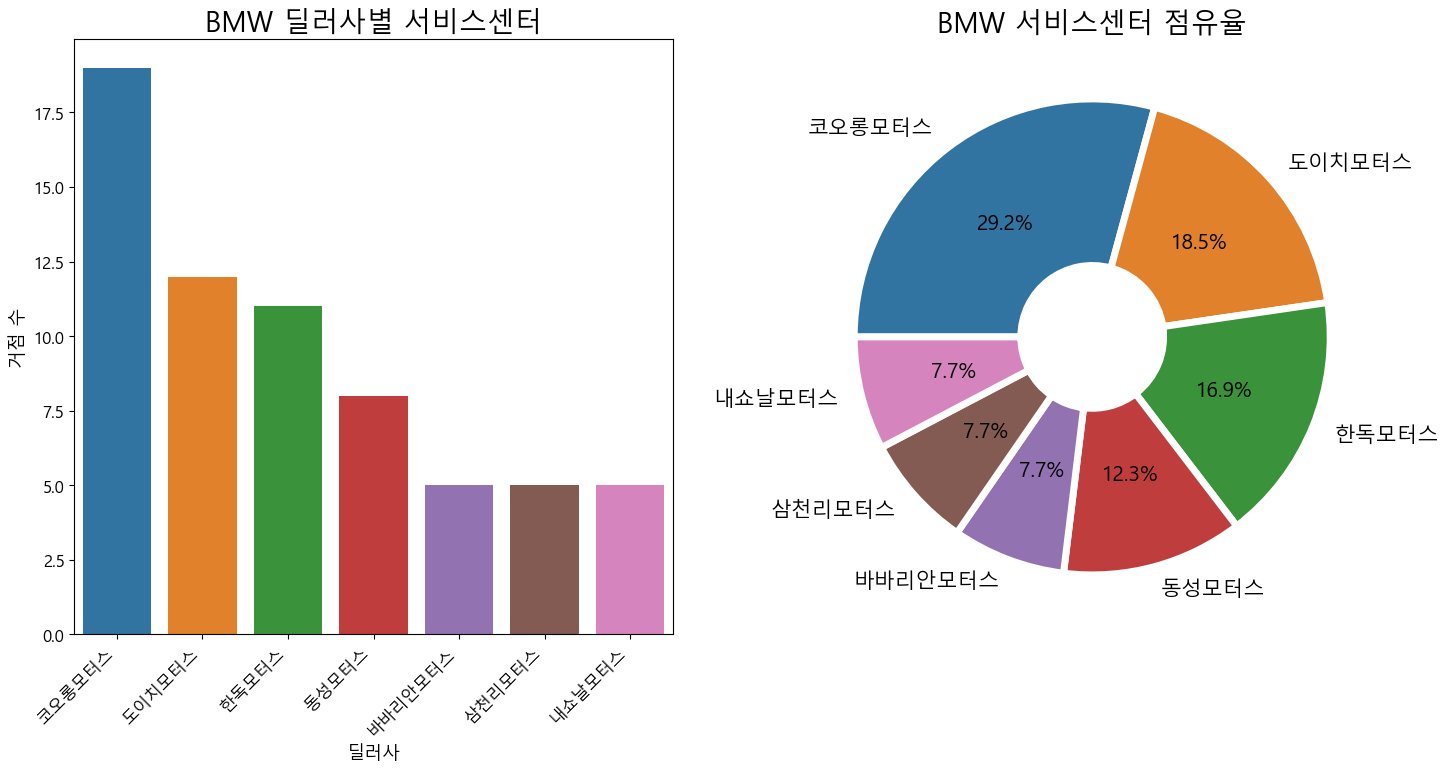

In [80]:
labels = ["코오롱모터스","도이치모터스","한독모터스","동성모터스","바바리안모터스"
          ,"삼천리모터스","내쇼날모터스"]

colors = ['#3274A1', '#E1812C','#3A923A','#C03D3E','#9372B2','#845B53','#D684BD']



plt.figure(figsize = (17,17))
plt.subplot(222)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(bmw_Dealer_sc_cnt["cnt"], 
        labels=labels, autopct='%.1f%%', startangle=180, counterclock=False, colors=colors, wedgeprops=wedgeprops,
        textprops = {'fontsize':15})
plt.title("BMW 서비스센터 점유율",size=20)




plt.subplot(221)
ax = sns.barplot(bmw_Dealer_sc_cnt['DealerName'],bmw_Dealer_sc_cnt['cnt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('BMW 딜러사별 서비스센터', size = 20)
plt.xlabel("딜러사", size = 13)
plt.ylabel("거점 수", size = 13)
plt.show()

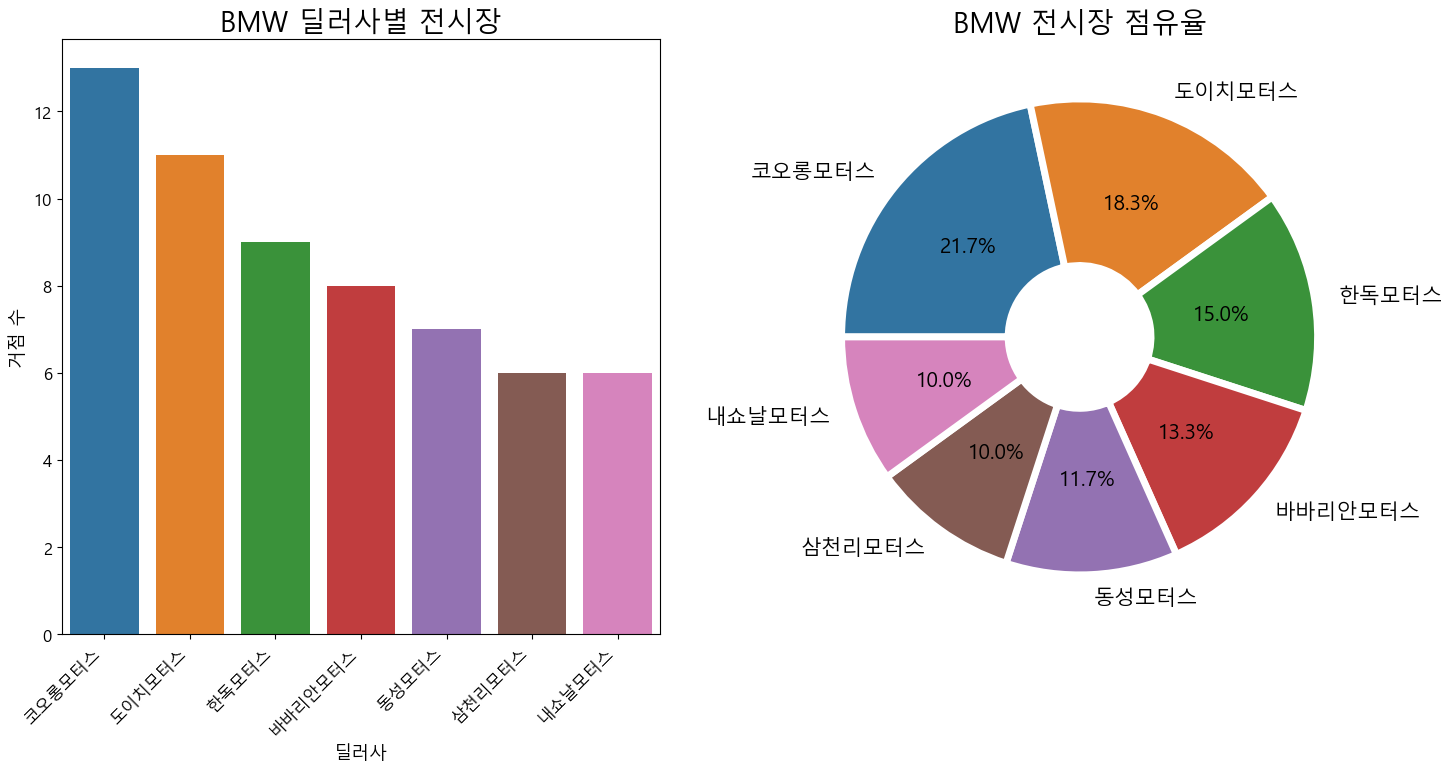

In [81]:
labels = ["코오롱모터스","도이치모터스","한독모터스","바바리안모터스","동성모터스"
          ,"삼천리모터스","내쇼날모터스"]

colors = ['#3274A1', '#E1812C','#3A923A','#C03D3E','#9372B2','#845B53','#D684BD']



plt.figure(figsize = (17,17))
plt.subplot(222)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(bmw_Dealer_sr_cnt["cnt"], 
        labels=labels, autopct='%.1f%%', startangle=180, counterclock=False, colors=colors, wedgeprops=wedgeprops,
        textprops = {'fontsize':15})
plt.title("BMW 전시장 점유율",size=20)




plt.subplot(221)
ax = sns.barplot(bmw_Dealer_sr_cnt['DealerName'],bmw_Dealer_sr_cnt['cnt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('BMW 딜러사별 전시장', size = 20)
plt.xlabel("딜러사", size = 13)
plt.ylabel("거점 수", size = 13)
plt.show()

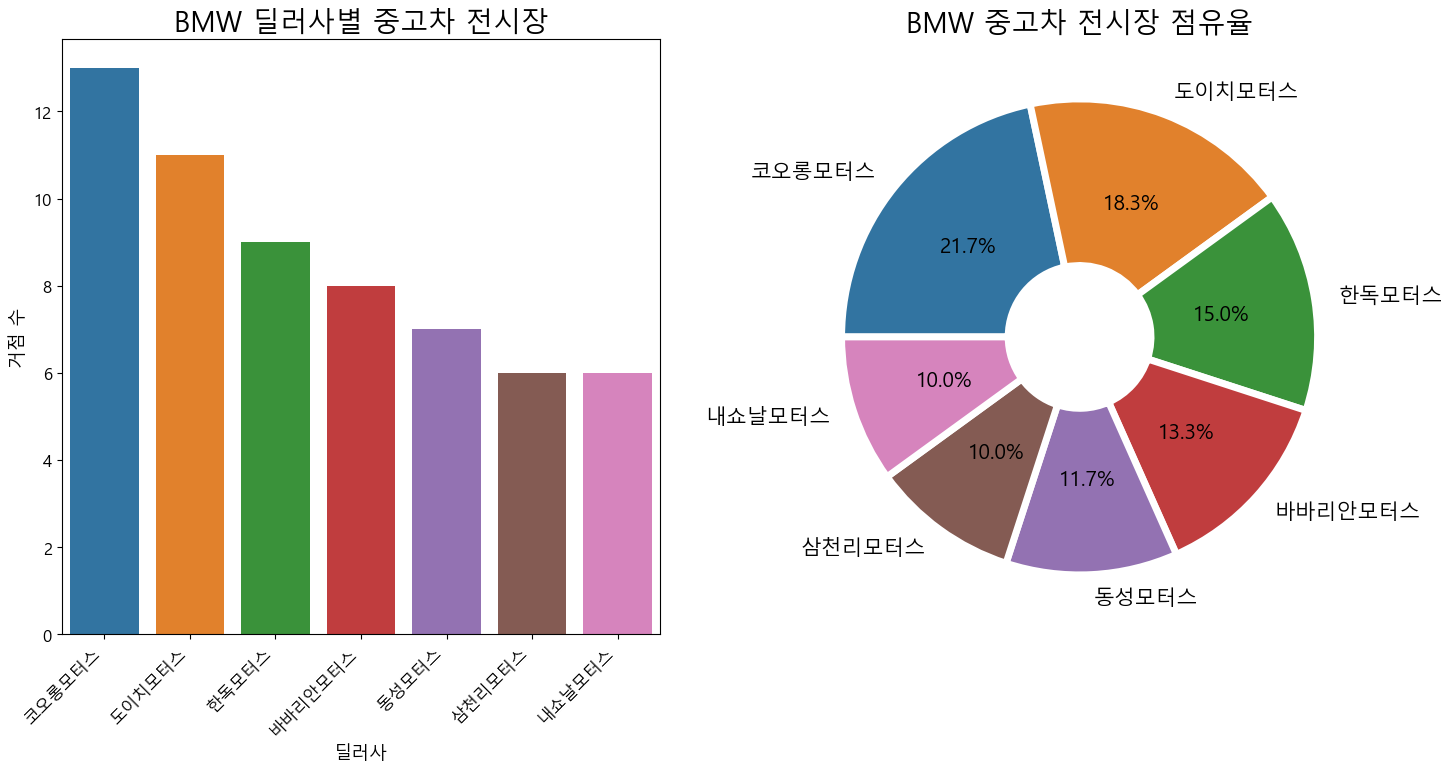

In [82]:
labels = ["코오롱모터스","도이치모터스","한독모터스","바바리안모터스","동성모터스"
          ,"삼천리모터스","내쇼날모터스"]

colors = ['#3274A1', '#E1812C','#3A923A','#C03D3E','#9372B2','#845B53','#D684BD']



plt.figure(figsize = (17,17))
plt.subplot(222)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(bmw_Dealer_bps_sr_cnt["cnt"], 
        labels=labels, autopct='%.1f%%', startangle=180, counterclock=False, colors=colors, wedgeprops=wedgeprops,
        textprops = {'fontsize':15})
plt.title("BMW 중고차 전시장 점유율",size=20)




plt.subplot(221)
ax = sns.barplot(bmw_Dealer_bps_sr_cnt['DealerName'],bmw_Dealer_bps_sr_cnt['cnt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('BMW 딜러사별 중고차 전시장', size = 20)
plt.xlabel("딜러사", size = 13)
plt.ylabel("거점 수", size = 13)
plt.show()

In [ ]:
WorksCombine Inc. 데이터연구소 2021.07